## DSCI-552 Homework 05

### Cassandra Man, USC ID #4731096972

In [1]:
# Import python libraries
import pandas as pd
import numpy as np
import seaborn as sn
from pandas import DataFrame
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.impute import SimpleImputer
from scipy.stats import variation
from pandas import DataFrame
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
import statistics
import warnings
import xgboost as xg
from sklearn.model_selection import GridSearchCV
from sklearn.tree import _tree

## 1. Decision Trees as Interpretable Models

### A. Download the Acute Inflammation Data

In [2]:
# Load .data file
df = pd.read_csv("../data/diagnosis.data",header = None, encoding="utf-16", sep="\t", engine="python", decimal = ",")
df.columns = ["A1", "temp_A2", "temp_A3", "temp_A4", "temp_A5", "temp_A6", "temp_D1", "temp_D2"]
# Preview data
df.head()

,A1,temp_A2,temp_A3,temp_A4,temp_A5,temp_A6,temp_D1,temp_D2
0,35.5,no,yes,no,no,no,no,no
1,35.9,no,no,yes,yes,yes,yes,no
2,35.9,no,yes,no,no,no,no,no
3,36.0,no,no,yes,yes,yes,yes,no
4,36.0,no,yes,no,no,no,no,no


### B. Build decision tree and plot

In [3]:
# Create new columns converting columns with "yes" --> 1 "no" --> 0
df["A2"] = np.where(df["temp_A2"]=="no", 0, 1)
df["A3"] = np.where(df["temp_A3"]=="no", 0, 1)
df["A4"] = np.where(df["temp_A4"]=="no", 0, 1)
df["A5"] = np.where(df["temp_A5"]=="no", 0, 1)
df["A6"] = np.where(df["temp_A6"]=="no", 0, 1)
df["D1"] = np.where(df["temp_D1"]=="no", 0, 1)
df["D2"] = np.where(df["temp_D2"]=="no", 0, 1)

# Drop original diagnosis column
df = df.drop(["temp_A2"], axis=1)
df = df.drop(["temp_A3"], axis=1)
df = df.drop(["temp_A4"], axis=1)
df = df.drop(["temp_A5"], axis=1)
df = df.drop(["temp_A6"], axis=1)
df = df.drop(["temp_D1"], axis=1)
df = df.drop(["temp_D2"], axis=1)

df

,A1,A2,A3,A4,A5,A6,D1,D2
0,35.5,0,1,0,0,0,0,0
1,35.9,0,0,1,1,1,1,0
2,35.9,0,1,0,0,0,0,0
3,36.0,0,0,1,1,1,1,0
4,36.0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
115,41.4,0,1,1,0,1,0,1
116,41.5,0,0,0,0,0,0,0
117,41.5,1,1,0,1,0,0,1
118,41.5,0,1,1,0,1,0,1


In [4]:
# Training set
x = df[["A1", "A2", "A3", "A4", "A5", "A6"]].copy()

# Test set
y = df[["D1", "D2"]].copy()

[Text(133.92000000000002, 195.696, 'X[0] <= 37.95\ngini = 0.493\nsamples = 120\nvalue = [[61, 59]\n[70, 50]]'),
 Text(66.96000000000001, 152.208, 'X[3] <= 0.5\ngini = 0.222\nsamples = 60\nvalue = [[20, 40]\n[60, 0]]'),
 Text(33.480000000000004, 108.72, 'gini = 0.0\nsamples = 20\nvalue = [[20, 0]\n[20, 0]]'),
 Text(100.44000000000001, 108.72, 'gini = 0.0\nsamples = 40\nvalue = [[0, 40]\n[40, 0]]'),
 Text(200.88000000000002, 152.208, 'X[2] <= 0.5\ngini = 0.355\nsamples = 60\nvalue = [[41, 19]\n[10, 50]]'),
 Text(167.40000000000003, 108.72, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[10, 0]]'),
 Text(234.36, 108.72, 'X[1] <= 0.5\ngini = 0.236\nsamples = 50\nvalue = [[31, 19]\n[0, 50]]'),
 Text(200.88000000000002, 65.232, 'gini = 0.0\nsamples = 21\nvalue = [[21, 0]\n[0, 21]]'),
 Text(267.84000000000003, 65.232, 'X[3] <= 0.5\ngini = 0.226\nsamples = 29\nvalue = [[10, 19]\n[0, 29]]'),
 Text(234.36, 21.744, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[0, 10]]'),
 Text(301.32000000000005, 2

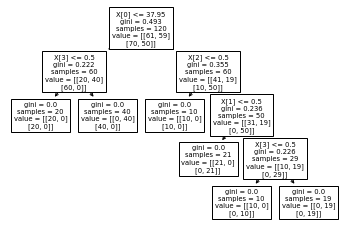

In [5]:
dt_classifier = tree.DecisionTreeClassifier()
dt_classifier = dt_classifier.fit(x,y)
tree.plot_tree(dt_classifier)

### C. Convert Decision Rules into Set of IF-THEN Rules

In [6]:
def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print ("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print ("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print ("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print ("{}return {}".format(indent, np.argmax(tree_.value[node])))

    recurse(0, 1)

In [7]:
tree_to_code(dt_classifier, list(df.columns))

def tree(A1, A2, A3, A4, A5, A6, D1, D2):
  if A1 <= 37.95000076293945:
    if A4 <= 0.5:
      return 0
    else:  # if A4 > 0.5
      return 1
  else:  # if A1 > 37.95000076293945
    if A3 <= 0.5:
      return 0
    else:  # if A3 > 0.5
      if A2 <= 0.5:
        return 0
      else:  # if A2 > 0.5
        if A4 <= 0.5:
          return 0
        else:  # if A4 > 0.5
          return 1


### D. Use Cost-Complexity Pruning to Find Minimal Decision Tree and Decision Rules with High Interpretability

In [8]:
# Find effective alphas
path=dt_classifier.cost_complexity_pruning_path(x, y)
ccp_alphas = path.ccp_alphas
print(ccp_alphas)

[0.         0.04908333 0.07947222 0.11111111 0.20423611]


In [9]:
# Get the second largest alpha value
# Note the maximum effective alpha value yields a tree with only one node
max_alpha = ccp_alphas[-2]

[Text(167.4, 163.07999999999998, 'X[0] <= 37.95\ngini = 0.493\nsamples = 120\nvalue = [[61, 59]\n[70, 50]]'),
 Text(83.7, 54.360000000000014, 'gini = 0.222\nsamples = 60\nvalue = [[20, 40]\n[60, 0]]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.355\nsamples = 60\nvalue = [[41, 19]\n[10, 50]]')]

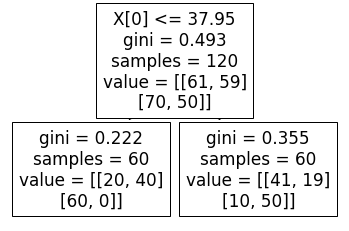

In [10]:
min_dt_classifier = tree.DecisionTreeClassifier(ccp_alpha=max_alpha)
min_dt_classifier.fit(x, y)
tree.plot_tree(min_dt_classifier)

In [11]:
# Get decision rules
text_representation = tree.export_text(min_dt_classifier, feature_names = list(x.columns))
print(text_representation)

|--- A1 <= 37.95
|   |--- class: 1
|--- A1 >  37.95
|   |--- class: 0



## LASSO and Boosting for Regression

### A. Download Communities and Crime Data

In [12]:
# Load .data file
df2 = pd.read_csv("../data/communities.data",header = None, sep=",", engine="python")

df2_header = []
for i in range(128):
    df2_header.append(str(i))
df2.columns = df2_header

# Preview data
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


In [13]:
# Training set
df2_train = df2.iloc[0:1495]

# Test set
df2_test = df2.iloc[1495:]

### B. Data Imputation

In [14]:
# Ignore non predictive features
df2_train_red = df2_train.drop(columns = ["0", "1", "2", "3", "4"])
df2_test_red = df2_test.drop(columns = ["0", "1", "2", "3", "4"])

new_header = []
for i in range(123):
    new_header.append(str(i))

In [15]:
# convert all "?" values to NaN
df2_train_red_nan = df2_train_red.apply (pd.to_numeric, errors="coerce")
df2_test_red_nan = df2_test_red.apply (pd.to_numeric, errors="coerce")

In [16]:
# data imputing
imp_median_train = SimpleImputer(missing_values= np.nan, strategy="median")
imp_median_train.fit(df2_train_red_nan)
imputed_train = imp_median_train.transform(df2_train_red_nan)

imp_median_test = SimpleImputer(missing_values= np.nan, strategy="median")
imp_median_test.fit(df2_test_red_nan)
imputed_test = imp_median_test.transform(df2_test_red_nan)

In [17]:
# convert array to DataFrame
df_imputed_train = pd.DataFrame(imputed_train, columns=new_header)

df_imputed_test = pd.DataFrame(imputed_test, columns=new_header)

In [18]:
df_imputed_train

,0,1,2,3,4,5,6,7,8,9,...,113,114,115,116,117,118,119,120,121,122
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.07,0.03,0.76,0.5,0.00,0.15,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,0.07,0.03,0.76,0.5,0.00,0.15,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.07,0.03,0.76,0.5,0.00,0.15,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.07,0.03,0.76,0.5,0.00,0.15,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,0.00,0.59,0.01,0.69,1.00,0.07,0.41,0.28,0.23,0.57,...,0.02,0.14,0.22,0.07,0.03,0.76,0.5,0.00,0.15,0.03
1491,0.16,0.62,0.03,0.74,0.48,0.42,0.44,0.57,0.40,0.25,...,0.07,0.40,0.14,0.07,0.05,0.85,0.5,0.61,0.19,0.20
1492,0.01,0.36,0.95,0.24,0.03,0.01,0.44,0.42,0.27,0.63,...,0.03,0.12,0.01,0.07,0.03,0.76,0.5,0.00,0.15,0.30
1493,0.06,0.53,0.01,0.98,0.05,0.01,0.40,0.40,0.24,0.29,...,0.08,0.15,0.02,0.07,0.03,0.76,0.5,0.00,0.15,0.03


In [19]:
df_imputed_test

,0,1,2,3,4,5,6,7,8,9,...,113,114,115,116,117,118,119,120,121,122
0,0.00,0.20,0.03,0.91,0.23,0.05,0.15,0.19,0.09,0.42,...,0.01,0.23,0.73,0.08,0.03,0.73,0.5,0.00,0.165,0.12
1,0.00,0.55,0.13,0.78,0.15,0.36,0.48,0.53,0.30,0.10,...,0.01,0.18,0.02,0.08,0.03,0.73,0.5,0.00,0.165,0.11
2,0.00,0.52,0.04,0.59,0.05,0.62,0.84,0.78,0.75,0.43,...,0.01,0.18,0.00,0.08,0.03,0.73,0.5,0.00,0.165,0.12
3,0.04,0.51,0.07,0.92,0.09,0.03,0.38,0.47,0.27,0.35,...,0.06,0.13,0.16,0.08,0.03,0.73,0.5,0.00,0.165,0.06
4,0.03,0.59,0.20,0.75,0.19,0.10,0.38,0.62,0.35,0.11,...,0.03,0.23,0.06,0.08,0.03,0.73,0.5,0.00,0.165,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,0.08,0.03,0.73,0.5,0.00,0.165,0.09
495,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,0.08,0.03,0.73,0.5,0.00,0.165,0.45
496,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.08,0.06,0.78,0.0,0.91,0.280,0.23
497,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.02,0.02,0.79,0.0,0.22,0.180,0.19


### C. Plot Correlation Matrix

In [20]:
train_features = df_imputed_train.drop(columns = ["122"])
test_features = df_imputed_test.drop(columns = ["122"])
fulldf = pd.concat([df_imputed_train, df_imputed_test])
featuresonly = pd.concat([train_features, test_features])

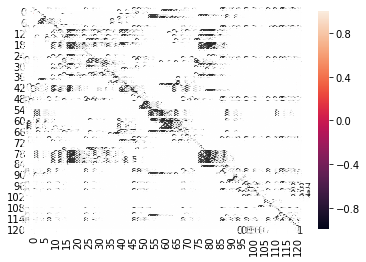

In [21]:
correlation_matrix = featuresonly.corr()
sn.heatmap(correlation_matrix, annot=True)
plt.show()

### D. Coefficent of Variation CV

In [22]:
featurenum = []
for i in range(121):
    featurenum.append(i)
df_featurenum = DataFrame(featurenum)

all_var = []
for i in range(121):
    var = variation(featuresonly[str(i)])
    all_var.append(var)
    print("CV of Feature " + str(i) + " = " + str(var))

CV of Feature 0 = 2.20294993386533
CV of Feature 1 = 0.3532097004119048
CV of Feature 2 = 1.4105665605340265
CV of Feature 3 = 0.3237003633601353
CV of Feature 4 = 1.3588213380942629
CV of Feature 5 = 1.6138729571484036
CV of Feature 6 = 0.36574812216270847
CV of Feature 7 = 0.2906199873800477
CV of Feature 8 = 0.4950363361780536
CV of Feature 9 = 0.4233355166105009
CV of Feature 10 = 2.0012416335137146
CV of Feature 11 = 0.6386886583257786
CV of Feature 12 = 0.5796080008727312
CV of Feature 13 = 0.32762787426405326
CV of Feature 14 = 0.6998545594658827
CV of Feature 15 = 0.3591498556991753
CV of Feature 16 = 0.3684202133633635
CV of Feature 17 = 0.6988551987450082
CV of Feature 18 = 0.3495513990736716
CV of Feature 19 = 0.5275995387856797
CV of Feature 20 = 0.5454965924474838
CV of Feature 21 = 0.5074249049035463
CV of Feature 22 = 0.5893211744649158
CV of Feature 23 = 0.8094820310422648
CV of Feature 24 = 0.6060418273404315
CV of Feature 25 = 0.6705229791495884
CV of Feature 26 = 0.4

### E. Select Features with High CV and Plot

In [23]:
# Select top 11 CVS
df_all_var = DataFrame(all_var)
var_feature = pd.concat([df_featurenum, df_all_var], axis = 1)
var_feature.columns = ["Feature", "CV"]
var_feature.sort_values(by=["CV"], inplace=True, ascending=False)
top_features = var_feature[:11]
top_features

,Feature,CV
108,108,5.446469
90,90,4.406597
89,89,3.484607
49,49,2.993446
51,51,2.899770
120,120,2.554625
27,27,2.304392
0,0,2.202950
10,10,2.001242
96,96,2.001088


In [24]:
# Select from original dataframe
feature_num_list = (top_features["Feature"]).to_list()
str_feature_num_list = []
for x in feature_num_list:
    str_feature_num_list.append(str(x))
df_topfeatures = featuresonly[str_feature_num_list]
df_topfeatures

,108,90,89,49,51,120,27,0,10,96,71
0,0.1,0.00,0.04,0.04,0.03,0.32,0.08,0.19,0.20,0.030,0.21
1,0.0,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.02,0.020,0.02
2,0.0,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.020,0.01
3,0.0,0.00,0.00,0.03,0.02,0.00,0.01,0.04,0.06,0.020,0.01
4,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.02,0.020,0.01
...,...,...,...,...,...,...,...,...,...,...,...
494,0.0,0.00,0.00,0.00,0.01,0.00,0.01,0.01,0.03,0.025,0.02
495,0.0,0.00,0.01,0.03,0.05,0.00,0.04,0.05,0.06,0.025,0.03
496,0.0,0.02,0.06,0.13,0.06,0.91,0.12,0.16,0.17,0.060,0.21
497,0.0,0.01,0.04,0.02,0.06,0.22,0.03,0.08,0.09,0.020,0.05


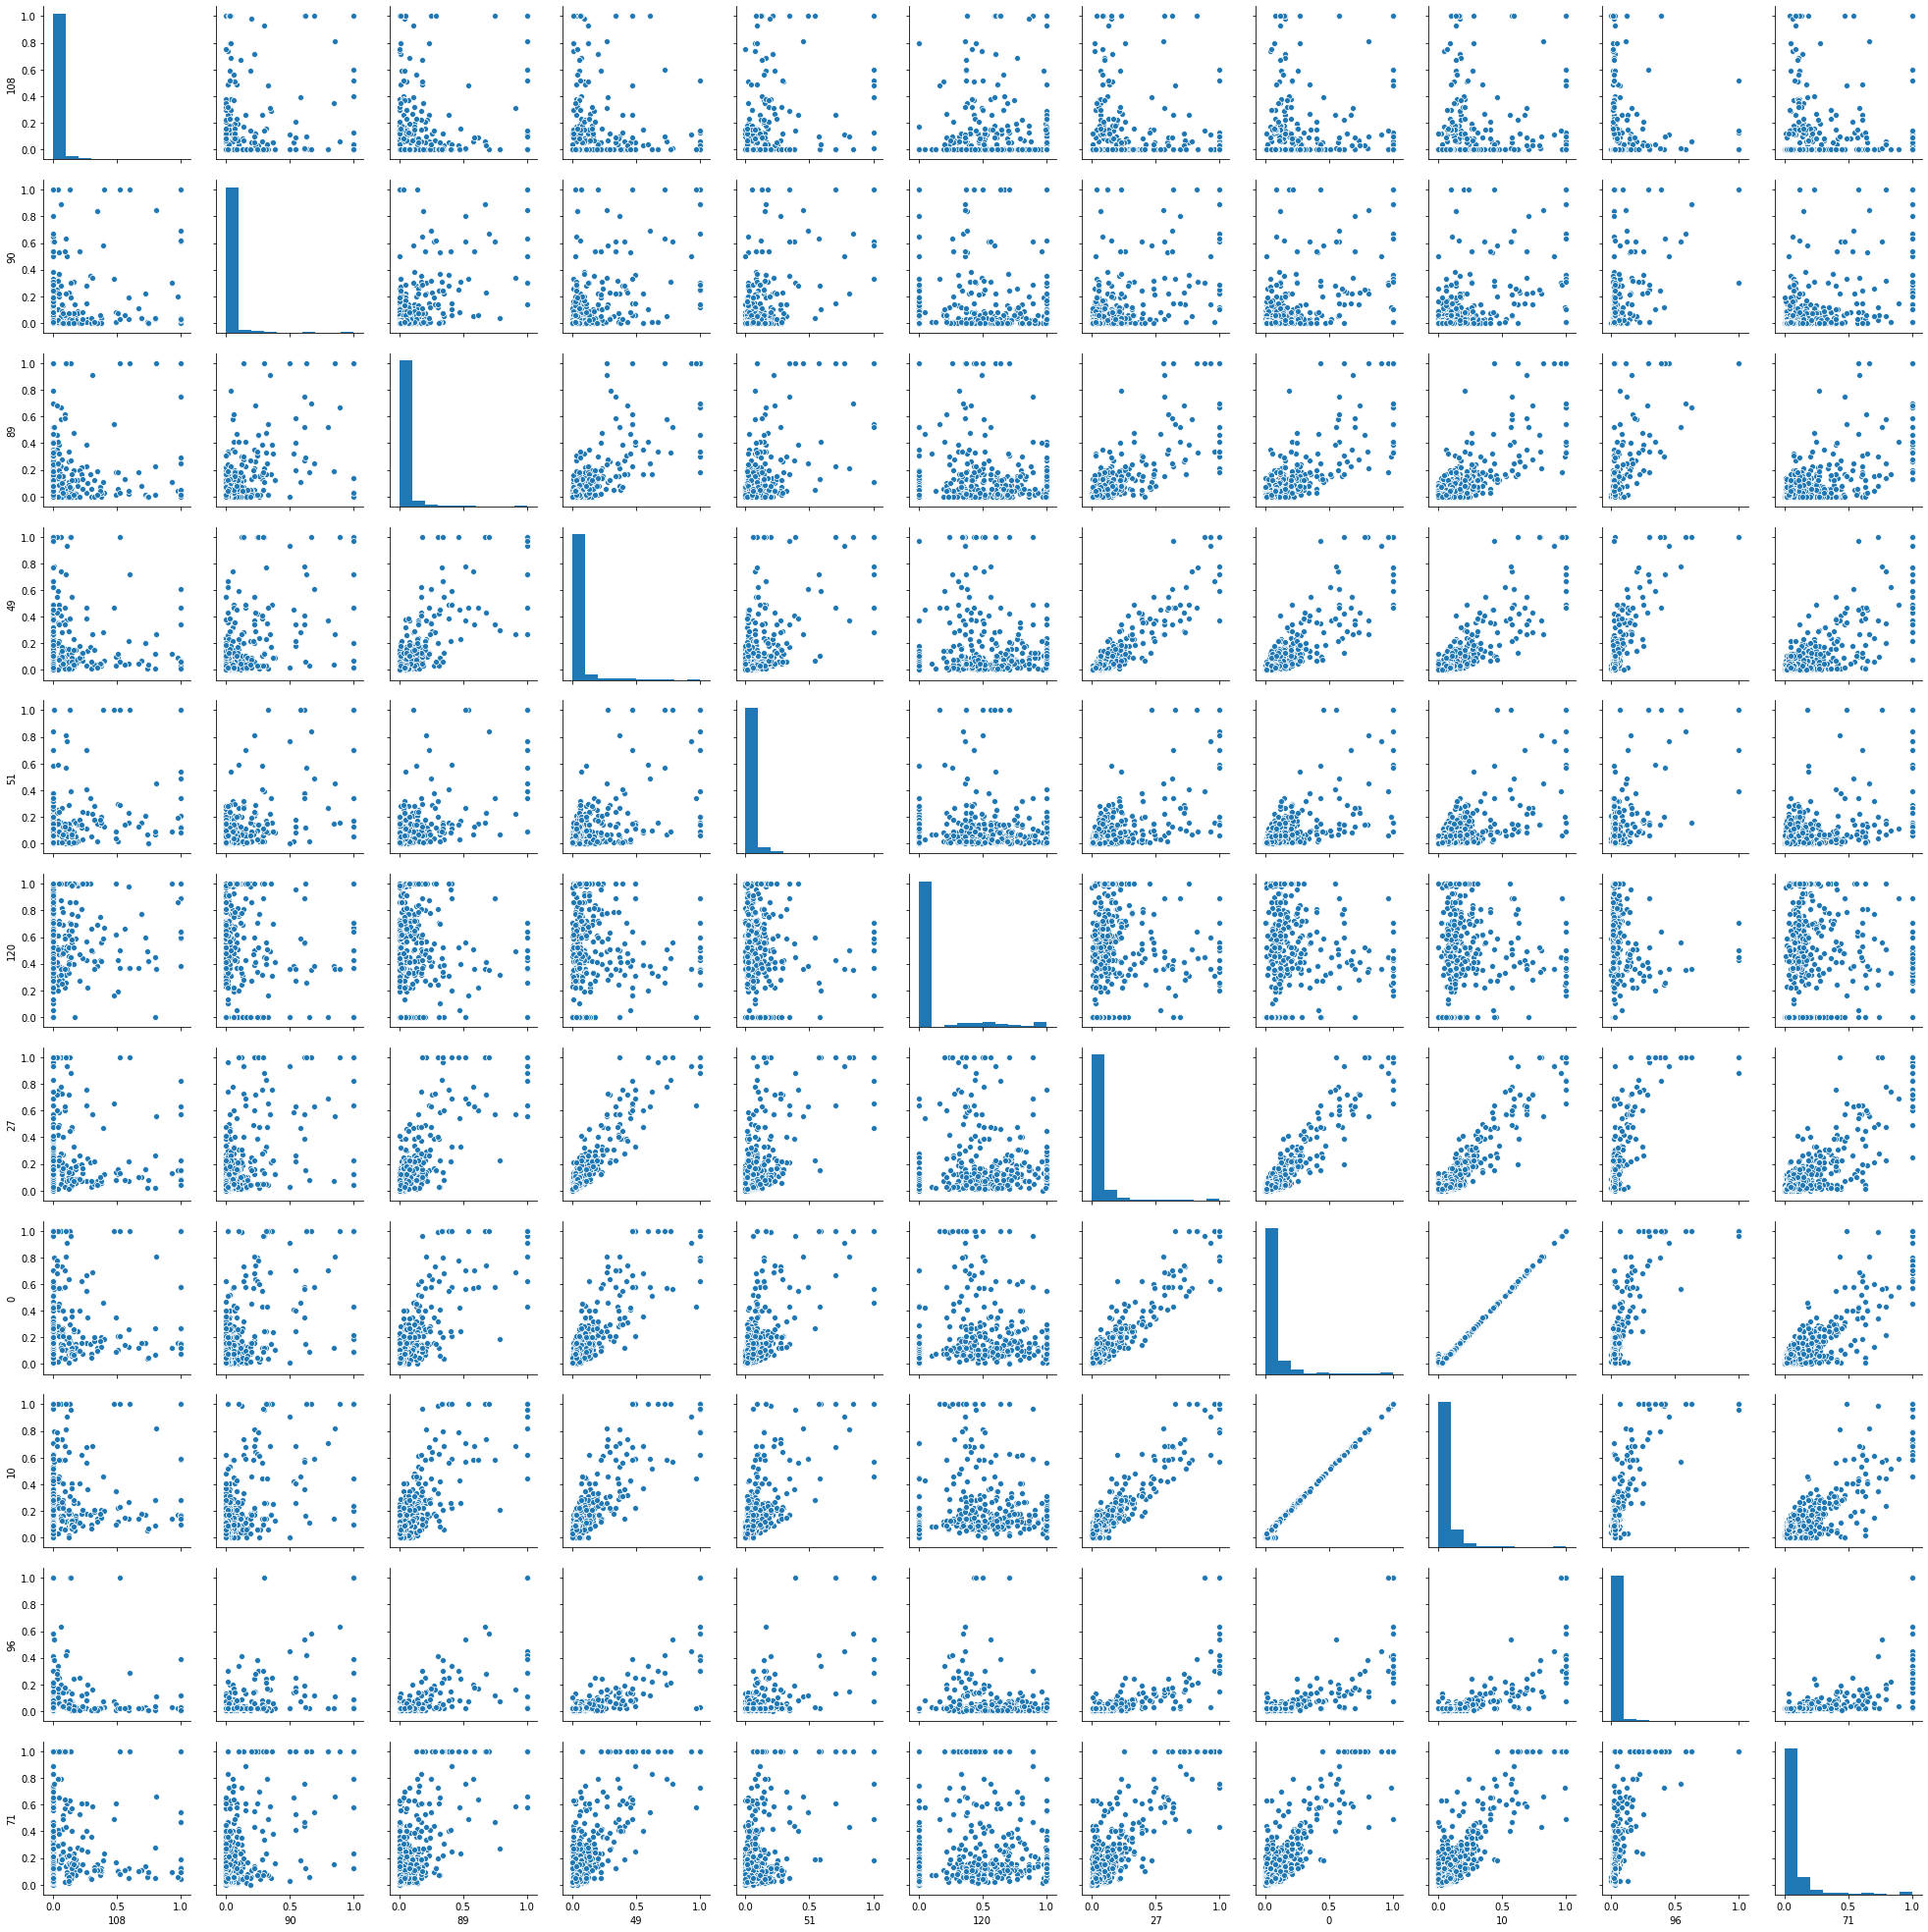

In [25]:
# Scatterplot
sn.pairplot(df_topfeatures)

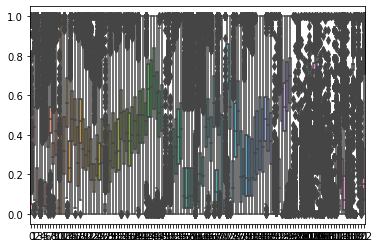

In [26]:
# boxplot
sn.boxplot(data=fulldf)

We cannot draw conclusions about the significance of those features visually from the scatterplots. Visually, we can only see any potential correlations between the features, which does not indicate how significant each feature is.

### F. Fit Linear Model using Least Squares

In [27]:
# Train Datasets
x_train = df_imputed_train.iloc[:,:-1]
y_train = df_imputed_train.iloc[:,-1:]

In [28]:
# Test Datasets
x_test = df_imputed_test.iloc[:,:-1]
y_test = df_imputed_test.iloc[:,-1:]

In [29]:
# Fit model and predict y
linreg = LinearRegression()
linreg.fit(x_train, y_train)

y_pred_linreg = linreg.predict(x_test)

In [30]:
# Calculate test error 
linreg_err = 1 - linreg.score(x_test, y_test)
print("The test error for a linear model is: " + str(linreg_err))

The test error for a linear model is: 0.3765039238177299


### G. Fit Ridge Regression Model

In [31]:
# Fit model and predict y
ridgereg = RidgeCV()
ridgereg.fit(x_train, y_train)

y_pred_ridgereg = ridgereg.predict(x_test)

In [32]:
# Calculate test error 
ridgereg_err = 1 - ridgereg.score(x_test, y_test)
print("The test error for a ridge regression model is: " + str(ridgereg_err)) 

The test error for a ridge regression model is: 0.3702149968595505


### H. Fit LASSO Model

In [33]:
warnings.filterwarnings("ignore")

In [34]:
# Fit model and predict y
lassoregcv = LassoCV()
lassoregcv.fit(x_train, y_train)

y_pred_lasso = lassoregcv.predict(x_test)

In [35]:
# Calculate test error for Lasso
lassocv_err = 1 - lassoregcv.score(x_test, y_test)
print("The test error for a LASSO model is: " + str(lassocv_err))

The test error for a LASSO model is: 0.36988126028241164


In [36]:
# Get features that were used by the model
all_coef_list = lassoregcv.coef_

# Iterate through list of coefficients to get features that were used (and coefficient is not 0)
multi_features_list = []
for i in range(0, len(all_coef_list)):
    if all_coef_list[i] != 0:
        multi_features_list.append(x_train.columns[i])
print(multi_features_list)

['2', '4', '6', '7', '11', '13', '14', '15', '16', '17', '18', '21', '22', '23', '24', '25', '26', '28', '29', '33', '34', '36', '38', '39', '40', '44', '45', '46', '48', '49', '50', '51', '52', '55', '59', '61', '63', '64', '67', '68', '69', '70', '71', '72', '74', '75', '76', '77', '78', '79', '82', '85', '86', '87', '88', '89', '90', '91', '92', '94', '99', '102', '104', '106', '107', '108', '111', '112', '113', '114', '115', '116', '118', '119']


In [37]:
# Standardize features after splitting to avoid data leakage
scaler = StandardScaler()
x_train_stan = scaler.fit_transform(x_train) 
x_test_stan = scaler.transform(x_test)

In [38]:
# Fit model and predict y
lassoregcv_stan = LassoCV()
lassoregcv_stan.fit(x_train_stan, y_train)

y_pred_lasso_stan = lassoregcv_stan.predict(x_test_stan)

In [39]:
# Calculate test error for Lasso
lassocv_err_stan = 1 - lassoregcv_stan.score(x_test_stan, y_test)
print("The test error for a LASSO model with standardized features is: " + str(lassocv_err_stan)) 

The test error for a LASSO model with standardized features is: 0.3712285473251027


In [40]:
# Get features that were used by the model
all_coef_list_stan = lassoregcv_stan.coef_

# Iterate through list of coefficients to get features that were used (and coefficient is not 0)
multi_features_list_stan = []
for i in range(0, len(all_coef_list_stan)):
    if all_coef_list_stan[i] != 0:
        multi_features_list_stan.append(x_train.columns[i])
print(multi_features_list_stan)

['2', '4', '6', '7', '11', '13', '14', '15', '16', '17', '18', '21', '22', '23', '24', '25', '26', '28', '29', '33', '34', '38', '39', '40', '44', '45', '46', '48', '49', '50', '51', '53', '55', '59', '61', '63', '64', '67', '68', '69', '71', '72', '74', '75', '76', '77', '78', '82', '85', '86', '87', '88', '89', '90', '91', '94', '99', '100', '102', '104', '106', '107', '108', '110', '111', '112', '113', '114', '115', '116', '118', '119']


The test error for a LASSO model with cross-validation was 0.3699, and the test error found with standardized features was 0.3712. The test error for the model with standardized features was slightly greater than the regular LASSO model, so the regular LASSO model with cross-validation performed better. 

### I. Fit PCR Model

In [41]:
# Fit PCA model on standardized data 
pca = PCA()
x_train_red = pca.fit_transform(x_train_stan)

In [42]:
# Create linear regressor
linreg_pca = LinearRegression()

In [43]:
# Set up for cross validation
cv = RepeatedKFold(n_splits=5, n_repeats=3)

In [44]:
# Iterate through sets of features and calculate MSE using cross-validation
mse_list = []

feature_count = x_train.shape[1] +1

for i in np.arange(1, feature_count):
    cvscore = cross_val_score(linreg_pca, x_train_red[:,:i], y_train, 
                              scoring='neg_mean_squared_error', 
                              cv=cv)
    mean_MSE = statistics.mean(cvscore)
    mse_list.append(mean_MSE)

In [45]:
# Select M number of principal componenets with lowest MSE from cross validation
absMSE_list = list(map(abs, mse_list))
m_feature = absMSE_list.index(min(absMSE_list)) + 1
print(m_feature)

96


In [46]:
# Fit PCR model with M principal components
pca_M = PCA()
x_train_red_M = pca_M.fit_transform(x_train_stan)
x_test_red_M = pca_M.transform(x_test_stan)[:, :m_feature]

In [47]:
# Linear regression
selected_x_train = x_train_red_M[:,:m_feature]
linreg_pca.fit(selected_x_train, y_train)

LinearRegression()

In [48]:
# Predict on test data and calculate error
y_pred_pca = linreg_pca.predict(x_test_red_M)
pca_err = mean_squared_error(y_test, y_pred_pca)
print("The test error for a PCR model with " + str(m_feature)+ " principal components is: " + str(pca_err))

The test error for a PCR model with 96 principal components is: 0.018302922941379356


### J. Fit Boosting Tree

In [49]:
# Create list of values for alpha to test in cross validation
alpha_list = {'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]}

In [50]:
# Create XGBoost Regression model and fit to data
xgbreg = xg.XGBRegressor()

In [51]:
# Cross validation 
xgbreg_cv = GridSearchCV(estimator = xgbreg, param_grid = alpha_list, scoring='roc_auc',n_jobs=4, cv=5)
xgbreg_cv.fit(x_train,y_train)

# Select alpha value that gave best results 
xgbreg_cv.best_params_

{'reg_alpha': 1e-05}

In [52]:
# Fit XGBoost Regression model tree with selected alpha

# Get value of selected alpha
selected_alpha = xgbreg_cv.best_params_.get("reg_alpha")

xgbreg_A = xg.XGBRegressor(reg_alpha = selected_alpha)
xgbreg_A.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=1e-05, reg_lambda=1, ...)

In [53]:
# Predict on test data and calculate error
y_pred_xgbreg_A = xgbreg_A.predict(x_test)
xgbreg_A_error = mean_squared_error(y_test, y_pred_xgbreg_A)
print("The test error for an L1 penalized gradient boosting tree with alpha =" + str(selected_alpha) + " is: " + str(xgbreg_A_error))

The test error for an L1 penalized gradient boosting tree with alpha =1e-05 is: 0.018068748372664867


### Works Cited

1. Convert Decision Tree to If-Then Rules
https://www.kdnuggets.com/2017/05/simplifying-decision-tree-interpretation-decision-rules-python.html
2. PCR with Cross Validation
https://www.statology.org/principal-components-regression-in-python/
3. XGBoost for Regression
https://www.geeksforgeeks.org/xgboost-for-regression/